<a href="https://colab.research.google.com/github/MarcoSuarezECCI/SeminarioBigData/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes**:
        Marco David Suarez Berdugo - 90649

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt

Se contruye el dataframe

In [5]:
data = {'year': [2010, 2011, 2012,
                 2010, 2011, 2012,
                 2010, 2011, 2012],
        'team': ['FCBarcelona', 'FCBarcelona',
                 'FCBarcelona', 'RMadrid',
                 'RMadrid', 'RMadrid',
                 'ValenciaCF', 'ValenciaCF',
                 'ValenciaCF'],
        'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19],
        'draws': [6, 7, 4, 5, 4, 7, 8, 10, 8],
        'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]}

football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'draws', 'losses'])

football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


Se obtiene permisos de drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Se busca el archivo

In [8]:
edu = pd.read_csv("/content/drive/MyDrive/data/Lab_1/educ_figdp_1_Data.csv",

na_values = ':',
usecols = ["TIME","GEO","Value"])

edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [ ]:
Ejercicio de filtrado

In [10]:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Filtrado por nulos

In [11]:
edu[edu["Value"].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


Obteniendo los máximos para cada columna

In [12]:
edu. max(axis = 0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

Organizando los valores de máximos

In [13]:
print("Pandas max function:", edu['Value'].max())
print("Python max function:", max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


Aplicando la raiz cuadradada a los valores

In [15]:
s = edu["Value"]. apply (np.sqrt)

s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

Aplicando lambda

In [16]:
s = edu["Value"]. apply ( lambda d: d**2)

s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

Dando nuevos valores al dataframe, a partir de calculo matematico

In [18]:
edu['ValueNorm'] = edu['Value']/edu['Value']. max ()

edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Borrando columnas ValueNorm

In [20]:
edu.drop('ValueNorm', axis = 1, inplace = True)

edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Realizando ordenamiento

In [24]:
edu.sort_values(by = 'Value', ascending = False ,

inplace = True)

edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


Agrupamientos

In [26]:
group = edu[["GEO", "Value"]].groupby('GEO').mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


Filtrado de tabla y pivoteo por las columnas GEO y TIME

In [27]:
filtered_data = edu[edu["TIME"] > 2005]

pivedu = pd. pivot_table( filtered_data , values = 'Value',

index = ['GEO'] ,
columns = ['TIME'])

pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


Graficas

<Axes: title={'center': 'Total Values for Country'}, xlabel='GEO'>

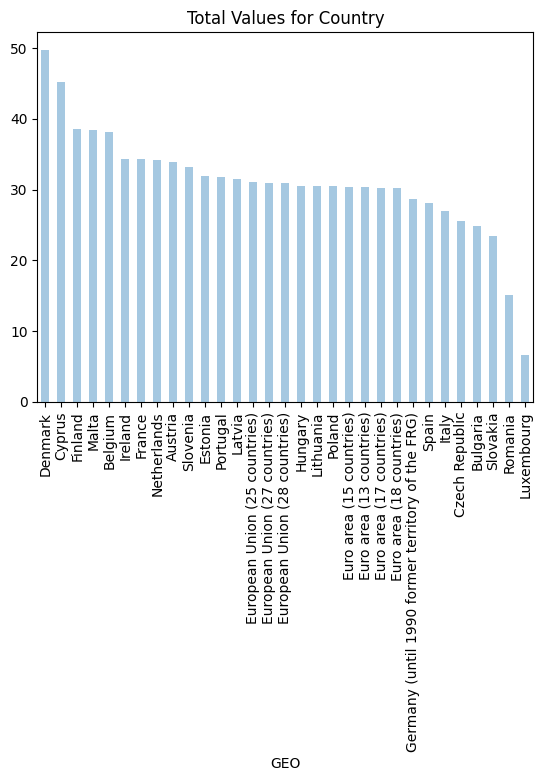

In [30]:
totalSum = pivedu. sum(axis = 1).sort_values(ascending = False)
totalSum. plot(kind = 'bar', style = 'b', alpha = 0.4,
title = "Total Values for Country")

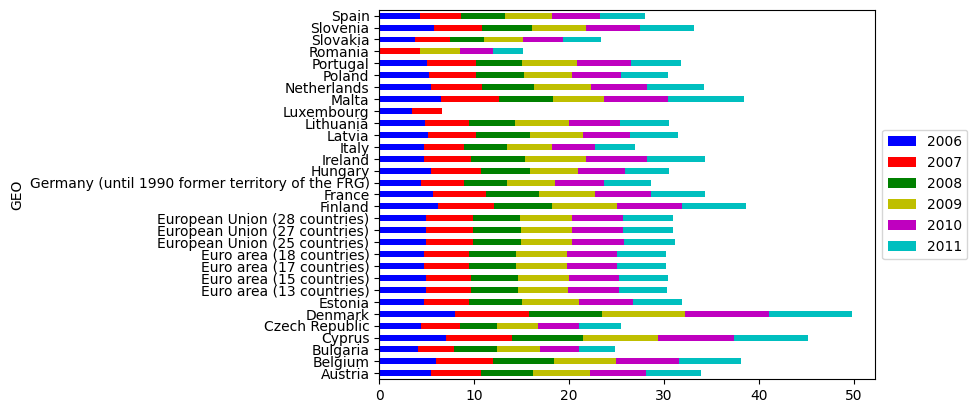

In [31]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu. plot(kind = 'barh',
stacked = True ,
color = my_colors)

ax.legend(loc = 'center left', bbox_to_anchor = (1, .5))